In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [55]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [56]:
def clean_data(data):
    features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
    X = data[features]
    X["Age"].fillna(mean_age, inplace=True)
    X["Embarked"].fillna("C", inplace=True)
    return X


In [57]:
X_train  = clean_data(train)
X_test  = clean_data(test)
y_train = train["Survived"]

X_test.head()

/tmp/ipykernel_10862/269025450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"].fillna(mean_age, inplace=True)
/tmp/ipykernel_10862/269025450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"].fillna("C", inplace=True)
/tmp/ipykernel_10862/269025450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"].fillna(mean_age, inplace=True)
/tmp/ipykernel_10862/269025450.py:5: SettingWithCopyWarning: 
A value 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [58]:
dis = train.groupby("Sex", as_index=False)["Survived"].mean()


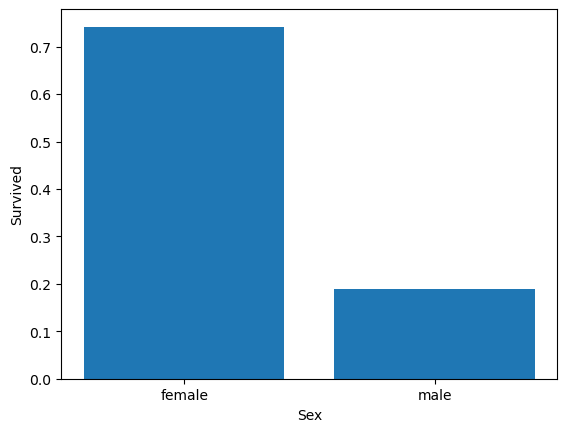

In [59]:
plt.bar(dis.Sex, dis.Survived)
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.show()

In [61]:
X_test["Survived"] = X_test["Sex"] == "male"

/tmp/ipykernel_10862/4198975777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Survived"] = X_test["Sex"] == "male"


In [72]:
model = LogisticRegression()
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [71]:
cat = pd.get_dummies(X_train[["Sex", "Embarked"]], dtype="int")
cat

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [81]:
cat_test = pd.get_dummies(X_test[["Sex", "Embarked"]], dtype="int")
cat_test

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,1,0,0,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,0,0,1
...,...,...,...,...,...
413,0,1,0,0,1
414,1,0,1,0,0
415,0,1,0,0,1
416,0,1,0,0,1


In [73]:
X_train_clean = pd.concat([X_train[["Pclass","Age", "SibSp","Parch","Fare"]], cat], axis=1)

In [76]:
model.fit(X_train_clean, y_train)

/home/mathias/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
X_test_clean = pd.concat([X_test[["Pclass","Age", "SibSp","Parch","Fare"]], cat_test], axis=1)
X_test_clean.fillna(1, inplace=True)


In [90]:
predictions = model.predict(X_test_clean)

In [91]:
test["Survived"] = predictions

In [93]:
submission = test[["PassengerId","Survived"]]

In [96]:
submission.to_csv("submission.csv", index=False)